In [101]:
import pymysql
con = pymysql.connect(host="Localhost", user="root", passwd="admin")
myCursor = con.cursor()
sql = "Create Database MOVIES;"
try:
    myCursor.execute(sql)
    con.commit()
    print("DataBase Created")
except:
    con.rollback()
    print("No effect")
sql = "Use MOVIES;"
try:
    myCursor.execute(sql)
    con.commit()
    print("Using DataBase")
except:
    con.rollback()
    print("No effect")
sql = "CREATE TABLE MOVIE (Sno int AUTO_INCREMENT PRIMARY KEY ,FName varchar(20) NOT NULL, LName varchar(20) NOT NULL, EMail_ID varchar(60), PhoneNo varchar(12),Password varchar(20) NOT NULL )"
try:
    myCursor.execute(sql)
    con.commit()
    print("Table Created")
except:
    con.rollback()
    print("No effect")
con.rollback()

sql = "alter table MOVIE add unique key email_password(EMail_ID,Password)"
try:
    myCursor.execute(sql)
    con.commit()
    print("Table Created")
except:
    con.rollback()
    print("No effect")
con.rollback()


No effect
Using DataBase
No effect
No effect


# Recommendation System

There are basically three types of recommender systems:-

* **Demographic Filtering**<br/>
They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

* **Content Based Filtering**<br/>
They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
 
* **Collaborative Filtering**<br/>
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

**Loading Data Set**

In [2]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('D:/Project/tmdb_5000_credits.csv')
df2=pd.read_csv('D:/Project/tmdb_5000_movies.csv')

The first dataset contains the following features:-

* **movie_id**<br/>
* **cast**<br/>
* **crew**<br/>

The second dataset has the following features:-

* **budget**<br/>
* **genre**<br/>
* **homepage**<br/>
* **id**<br/>
* **keywords**<br/>
* **original_language**<br/>
* **original_title**<br/>
* **overview**<br/>
* **popularity**<br/>
* **production_companies**<br/>
* **production_countries**<br/>
* **release_date**<br/>
* **revenue**<br/>
* **runtime**<br/>
* **status**<br/>
* **tagline**<br/>
* **title**<br/>
* **vote_average**<br/>
* **vote_count**<br/>

Join the two dataset on the **'id'** column

In [3]:
df1.columns = ['id','title','cast','crew']
df2= df2.merge(df1,on='id')

In [4]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## **Demographic Filtering**

Before starting with this -

* **we need a metric to score or rate movie**<br/>
* **Calculate the score for every movie**<br/>
* **Sort the scores and recommend the best rated movie to the users.**<br/><br/>
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, we'll use weighted rating (wr) which is given as :-

**Weighted Rating** = **($\frac{v}{v+m}$.R) + ($\frac{m}{v+m}$.C)**

where,

* **v** is the number of votes for the movie <br/>
* **m** is the minimum votes required to be listed in the chart mj<br/>
* **R** is the average rating of the movie<br/>
* **C** is the mean vote across the whole report<br/><br/>
We already have v(vote_count) and R (vote_average) and C can be calculated 

In [5]:
C= df2['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.

In [6]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

In [7]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",5.965250
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id""

In [10]:
#Sort movies on the function
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Under the **Trending Now** tab of the system we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

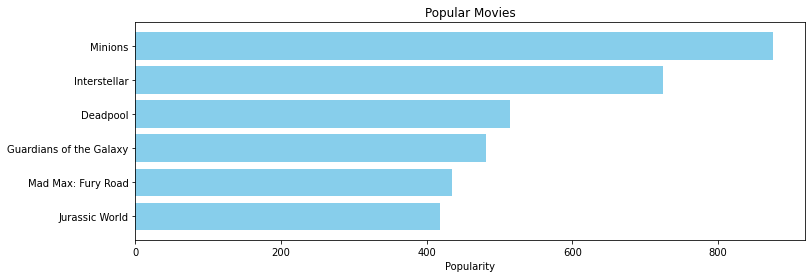

In [11]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
o1=pop

## Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

###      Plot Description Based Recommender

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.

In [12]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

With this matrix in hand, we can now compute a similarity score.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of **cosine_similarities()** since it is faster.

In [14]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [15]:
indices = pd.Series(df2.index, index=df2['title_x']).drop_duplicates()

These are the following steps we'll follow :-

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [16]:
def get_recommendations1(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title_x'].iloc[movie_indices]

In [17]:
def get_recommendations12(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movie_indices

In [18]:
a=get_recommendations1('The Dark Knight Rises')
b=get_recommendations12('The Dark Knight Rises')
print(type(a.get(b[0])))

<class 'str'>


In [19]:
print(get_recommendations1('The Avengers'))

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object


 "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## Credits, Genres and Keywords Based Recommender


<br/>We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, the data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [20]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [21]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [22]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [23]:
df2['director'] = df2['crew'].apply(get_director)
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [24]:
df2[['title_x', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that the vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [25]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [26]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to the vectorizer (namely actors, director and keywords).

In [27]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

The next steps are the same as what we did with the plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [30]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title_x'])

In [31]:
def get_recommendations2(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title_x'].iloc[movie_indices]

In [32]:
def get_recommendations21(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movie_indices

We can now reuse the get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [33]:
a=get_recommendations2('The Dark Knight Rises')
b=get_recommendations21('The Dark Knight Rises')
print(a.get(b[0]))

The Dark Knight


In [34]:
get_recommendations2('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_x, dtype: object

## Collaborative Filtering
<br/>The content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying the engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called **Collaborative Filtering** to make recommendations to Movie Watchers. It is basically of two types:-

* **User based filtering**- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is **scalability**. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, **sparsity** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

**Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance.**

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable.Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.

In [35]:
user = pd.read_csv("D:/Project/ratings_small.csv")

In [36]:
link = pd.read_csv("D:/Project/links_small.csv")

In [37]:
movie=pd.read_csv("D:/Project/tmdb_5000_movies.csv")

In [38]:
user = user.merge(link,on="movieId")

In [39]:
movie.rename(columns={"id":"tmdbId"},inplace=True)

In [40]:
movie.head()

,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [41]:
user=user.merge(movie,on="tmdbId")

In [81]:
user.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId',
       'budget', 'genres', 'homepage', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [43]:
df00=user[["userId","rating"]]

In [44]:
df00.head()

,userId,rating
0,1,3.0
1,19,3.0
2,23,3.5
3,30,3.0
4,70,5.0


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(df00)

StandardScaler()

In [48]:
scaled_features = scaler.transform(df00)

In [49]:
df_feat = pd.DataFrame(scaled_features,columns=df00.columns)
df_feat.head()

,userId,rating
0,-1.746940,-0.522938
1,-1.654662,-0.522938
2,-1.634155,-0.051498
3,-1.598269,-0.522938
4,-1.393206,1.362822


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df00["userId"],test_size=0.33)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,pred))

[[ 1  2  1 ...  0  0  0]
 [ 1 18  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  5  2]
 [ 0  0  0 ...  0  0 30]]


In [78]:
p=knn.predict(X_test)

In [79]:
p

array([534, 547, 157, ..., 380, 596, 551], dtype=int64)

In [86]:
print(user['original_title'][p[3]])

Dracula


In [117]:
from tkinter import*
from tkinter.messagebox import *
from tkinter import font
import pymysql
from PIL import ImageTk, Image
from tkinter import ttk
#from PyQt4 import QtGui

root=Tk()
root.wm_minsize(width=650,height=500)
root.wm_maxsize(width=650,height=500)
root.title('Movie Recommendation System')
appHighlightFont = font.Font(family='Times', size=17, weight='bold')
appHighlightFont1 = font.Font(family='Comic Sans MS', size=22, weight='bold')
appHighlightFont2 = font.Font(family='Times', size=18, weight='bold')

def x(e1,e2,e3,e4,e6):
    con = pymysql.connect(host="Localhost", user="root", passwd="admin", db="MOVIES")
    myCursor = con.cursor()
    sql = "INSERT INTO MOVIE(FName,LName,EMail_ID,PhoneNo,Password) VALUES (e1,e2,e3,e4,e6);"
    try:
        myCursor.execute(sql)
        con.commit()
        print("Record is inserted")
    except:
        con.rollback()
        print("No effect")
    con.rollback()

class Example(Frame):
    def __init__(self, master, *pargs):
        Frame.__init__(self, master, *pargs)
        self.image = Image.open("D:\Project\images2.jpg")
        self.img_copy= self.image.copy()
        self.background_image = ImageTk.PhotoImage(self.image)
        self.background = Label(self, image=self.background_image)
        self.background.pack(fill=BOTH, expand=YES)
        self.background.bind('<Configure>', self._resize_image)

    def _resize_image(self,event):
        new_width = event.width
        new_height = event.height
        self.image = self.img_copy.resize((new_width, new_height))
        self.background_image = ImageTk.PhotoImage(self.image)
        self.background.configure(image = self.background_image)
e = Example(root)
e.pack(fill=BOTH, expand=YES)

#registration form for new user
def new_user():
    t=Toplevel() #creates Toplevel object
    t.wm_minsize(width=600, height=500)
    t.wm_maxsize(width=600, height=500)

    class Example(Frame):
        def __init__(self, master, *pargs):
            Frame.__init__(self, master, *pargs)
            self.image = Image.open("D:\Project\images3..jpg")
            self.img_copy = self.image.copy()
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background = Label(self, image=self.background_image)
            self.background.pack(fill=BOTH, expand=YES)
            self.background.bind('<Configure>', self._resize_image)

        def _resize_image(self, event):
            new_width = event.width
            new_height = event.height
            self.image = self.img_copy.resize((new_width, new_height))
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background.configure(image=self.background_image)
    e = Example(t)
    e.pack(fill=BOTH, expand=YES)

#heading
    l2=Label(t,text="       REGISTRATION FORM       ",font=appHighlightFont2,fg='Blue',bg='Light Blue')
    l2.place(x=150,y=50)

    #first name
    entryText1 = StringVar()
    e1=Entry(t,textvariable=entryText1,fg='yellow',justify='center',bg='Steel blue')
    e1.place(width=240,height=30,x=200,y=150)
    l171 = Label(t, text='First Name', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=150)

    #last name
    entryText2 = StringVar()
    e2 = Entry(t, textvariable=entryText2, fg='yellow', justify='center', bg='Steel blue')
    e2.place(width=240, height=30, x=200, y=200)
    l171 = Label(t, text='Last Name', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=200)
    
    entryText3 = StringVar()
    e3 = Entry(t, textvariable=entryText3, fg='yellow', justify='center', bg='Steel blue')
    e3.place(width=240, height=30, x=200, y=250)
    l171 = Label(t, text='Email ID', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=250)


    entryText4 = StringVar()
    e4 = Entry(t, textvariable=entryText4, fg='yellow', justify='center', bg='Steel blue')
    e4.place(width=240, height=30, x=200, y=300)
    l171 = Label(t, text='Contact No.', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=300)


    entryText6 = StringVar()
    e6 = Entry(t, textvariable=entryText6, fg='yellow', justify='center', bg='Steel blue')
    e6.place(width=240, height=30, x=200, y=350)
    l171 = Label(t, text='Password', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=350)


    e8 = Button(t, text="SUBMIT",borderwidth=8, font=appHighlightFont, fg='yellow', bg='Steel blue',command=x(e1,e2,e3,e4,e6))
    e8.place(x=100, y=450, width=150, height=33)

    e9 = Button(t, text="LOGIN",borderwidth=8, font=appHighlightFont, fg='yellow', bg='Steel blue', command=registered_user)
    e9.place(x=400, y=450, width=150, height=33)
    
    t.mainloop()


#registered user
def registered_user():
    t1 = Toplevel()  # creates Toplevel object
    t1.wm_minsize(width=650, height=400)
    t1.wm_maxsize(width=650, height=400)

    class Example(Frame):
        def __init__(self, master, *pargs):
            Frame.__init__(self, master, *pargs)
            self.image = Image.open("D:\Project\images3..jpg")
            self.img_copy = self.image.copy()
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background = Label(self, image=self.background_image)
            self.background.pack(fill=BOTH, expand=YES)
            self.background.bind('<Configure>', self._resize_image)

        def _resize_image(self, event):
            new_width = event.width
            new_height = event.height
            self.image = self.img_copy.resize((new_width, new_height))
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background.configure(image=self.background_image)

    e = Example(t1)
    e.pack(fill=BOTH, expand=YES)

    # heading
    l2 = Label(t1, text="       LOGIN FORM       ", font=appHighlightFont2, fg='Blue', bg='Light Blue')
    l2.place(x=195, y=50)



    # first name
    entryText1 = StringVar()
    e1 = Entry(t1, textvariable=entryText1, fg='yellow', justify='center', bg='Steel blue')
    e1.place(width=240, height=30, x=200, y=150)
    l171 = Label(t1, text='Email ID', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=150)
    # pass
    entryText2 = StringVar()
    e2 = Entry(t1, textvariable=entryText2, fg='yellow', justify='center', bg='Steel blue')
    e2.place(width=240, height=30, x=200, y=200)
    l171 = Label(t1, text='Password', font=appHighlightFont, fg='white', bg='blue', justify='center')
    l171.place(x=50, y=200)
    LOGIN=0
    def yy():
        con = pymysql.connect(host="Localhost", user="root", passwd="admin", db="MOVIES")
        myCursor = con.cursor()
        sql = "Select EMail_ID , Password FROM MOVIE"
        try:
            myCursor.execute(sql)
            rows=myCursor.fetchall()
            if (rows[0][0]==e1 and rows[0][1]==e2):
                LOGIN=1
            con.commit()
        except:
            con.rollback()

    e3 = Button(t1, text="NEW REGISTER",borderwidth=8, font=appHighlightFont, fg='yellow', bg='Steel blue', command=new_user)
    e3.place(x=100, y=300, width=180, height=33)
    e5 = Button(t1, text="LOGIN",borderwidth=8, font=appHighlightFont, fg='yellow', bg='Steel blue', command=dashboard)      
    e5.place(x=400, y=300, width=150, height=33)
    t1.mainloop()

def dashboard():
    t2=Toplevel()
    t2.wm_minsize(width=750, height=700)
    t2.wm_maxsize(width=750, height=700)

    class Example(Frame):
        def __init__(self, master, *pargs):
            Frame.__init__(self, master, *pargs)
            self.image = Image.open("D:\Project\images3..jpg")
            self.img_copy = self.image.copy()
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background = Label(self, image=self.background_image)
            self.background.pack(fill=BOTH, expand=YES)
            self.background.bind('<Configure>', self._resize_image)

        def _resize_image(self, event):
            new_width = event.width
            new_height = event.height
            self.image = self.img_copy.resize((new_width, new_height))
            self.background_image = ImageTk.PhotoImage(self.image)
            self.background.configure(image=self.background_image)

    e = Example(t2)
    e.pack(fill=BOTH, expand=YES)

    l1 = Label(t2, text="       USER DASHBOARD       ", font=appHighlightFont2, fg='Blue', bg='Light Blue')
    l1.place(x=160, y=80)

    l2 = Label(t2, text="POPULAR MOVIES", font=appHighlightFont,fg='yellow',bg='blue',justify='center')
    l2.place(x=30, y=150)
    l6 = Label(t2, text=o1['title_x'][0], font=appHighlightFont, fg='white',bg='blue', justify='center')
    l6.place(x=10, y=200)
    l7 = Label(t2, text=o1['title_x'][1], font=appHighlightFont, fg='white',bg='blue', justify='center')
    l7.place(x=100, y=200)
    l8 = Label(t2, text=o1['title_x'][2], font=appHighlightFont, fg='white',bg='blue', justify='center')
    l8.place(x=550, y=200)
    ab=get_recommendations1(o1['title_x'][0])
    bb=get_recommendations12(o1['title_x'][0])
    out1=ab.get(bb[0])
    ab=get_recommendations1(o1['title_x'][1])
    bb=get_recommendations12(o1['title_x'][1])
    out2=ab.get(bb[0])
    ab=get_recommendations1(o1['title_x'][2])
    bb=get_recommendations12(o1['title_x'][2])
    out3=ab.get(bb[0])
    l3 = Label(t2, text="SIMILAR MOVIES",font=appHighlightFont,fg='yellow',bg='blue',justify='center')
    l3.place(x=30, y=280)
    l9 = Label(t2, text=out1, font=appHighlightFont, fg='white', bg='blue', justify='center')
    l9.place(x=10, y=330)
    l10 = Label(t2, text=out2, font=appHighlightFont, fg='white', bg='blue', justify='center')
    l10.place(x=120, y=330)
    l11 = Label(t2, text=out3, font=appHighlightFont, fg='white', bg='blue', justify='center')
    l11.place(x=450, y=330)
    ab=get_recommendations2(o1['title_x'][0])
    bb=get_recommendations21(o1['title_x'][0])
    out1=ab.get(bb[0])
    ab=get_recommendations2(o1['title_x'][1])
    bb=get_recommendations21(o1['title_x'][1])
    out2=ab.get(bb[0])
    ab=get_recommendations2(o1['title_x'][2])
    bb=get_recommendations21(o1['title_x'][2])
    out3=ab.get(bb[0])
    l4 = Label(t2, text="FAVOURITE GENRE",font=appHighlightFont, fg='yellow',bg='blue',justify='center')
    l4.place(x=30, y=410)
    l12 = Label(t2, text=out1 , font=appHighlightFont, fg='white', bg='blue', justify='center')
    l12.place(x=10, y=460)
    l13 = Label(t2, text=out2, font=appHighlightFont, fg='white', bg='blue', justify='center')
    l13.place(x=120, y=460)
    l14 = Label(t2, text=out3, font=appHighlightFont, fg='white', bg='blue', justify='center')
    l14.place(x=450, y=460)

    l5 = Label(t2, text="USERS CHOICE", font=appHighlightFont, fg='yellow', bg='blue',justify='center')
    l5.place(x=30, y=540)
    l15 = Label(t2, text=user['original_title'][p[0]], font=appHighlightFont, fg='yellow', bg='blue', justify='center')
    l15.place(x=10, y=610)
    l16 = Label(t2, text=user['original_title'][p[2]], font=appHighlightFont, fg='yellow', bg='blue', justify='center')
    l16.place(x=250, y=610)
    l17 = Label(t2, text=user['original_title'][p[3]], font=appHighlightFont, fg='yellow', bg='blue', justify='center')
    l17.place(x=400, y=610)


#root part
l1=Label(root,text="WELCOME TO THE LOGIN FORM",font=appHighlightFont1,fg='Dark Green',bg='Yellow')
#l1(root,image="D:\Project\images2.jpg",bg='grey').pack()
l1.place(x=85,y=30)

canvas = Canvas(root, width = 190, height = 170)
canvas.place(x=240,y=100)
img = ImageTk.PhotoImage(Image.open("D:\Project\images6.jpg"))
canvas.create_image(0, 0, anchor=NW, image=img)


#Creates Button for click on new user
b1=Button(root,text="NEW USER",borderwidth=8,font=appHighlightFont,width=15,height=2,fg='yellow',bg='#667C26',command=new_user)
b1.place(x=225,y=300)

#Creates Button for click on Registered user
b2=Button(root,text="REGISTERED USER",borderwidth=8,font=appHighlightFont,width=25,height=2,fg='Yellow',bg='#667C26',command=registered_user)
b2.place(x=150,y=400)

root.mainloop()

Incorrect Email or Password
